In [1]:
from nltk.corpus import stopwords

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("fake-news/train.csv")

In [4]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [5]:
df.shape

(20800, 5)

In [6]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [7]:
df = df.dropna()

In [8]:
df.shape

(18285, 5)

In [9]:
X = df.drop('label',axis=1)

In [10]:
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [11]:
y = df['label']

In [12]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [13]:
X.shape

(18285, 4)

In [14]:
y.shape

(18285,)

In [15]:
import tensorflow as tf
tf.__version__

2022-08-02 16:46:41.203695: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-02 16:46:41.203722: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


'2.9.1'

In [16]:
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot


In [17]:
voc_size = 5000

In [18]:
messages = X.copy()

In [19]:
messages['title']

0        House Dem Aide: We Didn’t Even See Comey’s Let...
1        FLYNN: Hillary Clinton, Big Woman on Campus - ...
2                        Why the Truth Might Get You Fired
3        15 Civilians Killed In Single US Airstrike Hav...
4        Iranian woman jailed for fictional unpublished...
                               ...                        
20795    Rapper T.I.: Trump a ’Poster Child For White S...
20796    N.F.L. Playoffs: Schedule, Matchups and Odds -...
20797    Macy’s Is Said to Receive Takeover Approach by...
20798    NATO, Russia To Hold Parallel Exercises In Bal...
20799                            What Keeps the F-35 Alive
Name: title, Length: 18285, dtype: object

In [20]:
messages.reset_index(inplace=True)

In [21]:
messages

,index,id,title,author,text
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...
...,...,...,...,...,...
18280,20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...
18281,20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...
18282,20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...
18283,20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal..."


In [22]:
import re
from nltk.stem import WordNetLemmatizer

In [23]:
lm = WordNetLemmatizer()
corpus = []
for i in range(len(messages)):
    review = re.sub('[^a-zA-Z]',' ',messages['title'][i])
    review = review.lower()
    review  = review.split()
    review = [lm.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [24]:
corpus

['house dem aide even see comey letter jason chaffetz tweeted',
 'flynn hillary clinton big woman campus breitbart',
 'truth might get fired',
 'civilian killed single u airstrike identified',
 'iranian woman jailed fictional unpublished story woman stoned death adultery',
 'jackie mason hollywood would love trump bombed north korea lack trans bathroom exclusive video breitbart',
 'beno hamon win french socialist party presidential nomination new york time',
 'back channel plan ukraine russia courtesy trump associate new york time',
 'obama organizing action partner soros linked indivisible disrupt trump agenda',
 'bbc comedy sketch real housewife isi cause outrage',
 'russian researcher discover secret nazi military base treasure hunter arctic photo',
 'u official see link trump russia',
 'yes paid government troll social medium blog forum website',
 'major league soccer argentine find home success new york time',
 'well fargo chief abruptly step new york time',
 'anonymous donor pay 

In [25]:
corpus[1]

'flynn hillary clinton big woman campus breitbart'

In [26]:
onehot_repr = [one_hot(words,voc_size) for words in corpus]
onehot_repr[1]

[2400, 1886, 3132, 1796, 197, 641, 1546]

## Embedding representation

In [27]:
sent_len = 20
embedded_seq = pad_sequences(onehot_repr,padding='pre',maxlen=sent_len)
embedded_seq

array([[   0,    0,    0, ..., 1424, 2244,  194],
       [   0,    0,    0, ...,  197,  641, 1546],
       [   0,    0,    0, ..., 3699, 2027, 4029],
       ...,
       [   0,    0,    0, ..., 4387, 2036, 2309],
       [   0,    0,    0, ..., 3837, 3019, 2879],
       [   0,    0,    0, ...,  432,  604, 1269]], dtype=int32)

In [28]:
embedding_vector_size = 40
model = Sequential()
model.add(Embedding(voc_size,embedding_vector_size,input_length=sent_len))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

2022-08-02 16:47:07.459635: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-02 16:47:07.459947: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-02 16:47:07.460065: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-08-02 16:47:07.460179: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-08-02 16:47:07.460261: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 40)            200000    
                                                                 
 lstm (LSTM)                 (None, 100)               56400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________


In [30]:
len(embedded_seq),y.shape

(18285, (18285,))

In [32]:
import numpy as np
X_final=np.array(embedded_seq)
y_final=np.array(y)

In [33]:
X_final.shape,y_final.shape

((18285, 20), (18285,))

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

In [36]:
print(X_train.shape),print(X_test.shape),print(y_train.shape),print(y_test.shape)

(12250, 20)
(6035, 20)
(12250,)
(6035,)


(None, None, None, None)

In [37]:
### Finally Training
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20,batch_size=64)

Epoch 1/20
192/192 [==============================] - 7s 23ms/step - loss: 0.3389 - accuracy: 0.8433 - val_loss: 0.1977 - val_accuracy: 0.9155
Epoch 2/20
192/192 [==============================] - 4s 21ms/step - loss: 0.1378 - accuracy: 0.9469 - val_loss: 0.2001 - val_accuracy: 0.9145
Epoch 3/20
192/192 [==============================] - 4s 20ms/step - loss: 0.0933 - accuracy: 0.9655 - val_loss: 0.2205 - val_accuracy: 0.9190
Epoch 4/20
192/192 [==============================] - 4s 22ms/step - loss: 0.0667 - accuracy: 0.9762 - val_loss: 0.2918 - val_accuracy: 0.9142
Epoch 5/20
192/192 [==============================] - 4s 21ms/step - loss: 0.0414 - accuracy: 0.9871 - val_loss: 0.3349 - val_accuracy: 0.9130
Epoch 6/20
192/192 [==============================] - 4s 21ms/step - loss: 0.0273 - accuracy: 0.9916 - val_loss: 0.2876 - val_accuracy: 0.9123
Epoch 7/20
192/192 [==============================] - 4s 20ms/step - loss: 0.0190 - accuracy: 0.9944 - val_loss: 0.4525 - val_accuracy: 0.9080

In [39]:
model.predict(X_test)

189/189 [==============================] - 1s 5ms/step


array([[9.9998379e-01],
       [3.1007858e-05],
       [3.4391698e-10],
       ...,
       [1.3089575e-09],
       [9.9993736e-01],
       [9.9978483e-01]], dtype=float32)

In [41]:
from tensorflow.keras.layers import Dropout
## Creating model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_len))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [42]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20,batch_size=64)

Epoch 1/20
192/192 [==============================] - 7s 24ms/step - loss: 0.3442 - accuracy: 0.8380 - val_loss: 0.1954 - val_accuracy: 0.9176
Epoch 2/20
192/192 [==============================] - 4s 22ms/step - loss: 0.1494 - accuracy: 0.9424 - val_loss: 0.1909 - val_accuracy: 0.9190
Epoch 3/20
192/192 [==============================] - 4s 21ms/step - loss: 0.1069 - accuracy: 0.9607 - val_loss: 0.2155 - val_accuracy: 0.9190
Epoch 4/20
192/192 [==============================] - 4s 21ms/step - loss: 0.0840 - accuracy: 0.9695 - val_loss: 0.2635 - val_accuracy: 0.9186
Epoch 5/20
192/192 [==============================] - 4s 21ms/step - loss: 0.0656 - accuracy: 0.9781 - val_loss: 0.2973 - val_accuracy: 0.9153
Epoch 6/20
192/192 [==============================] - 4s 21ms/step - loss: 0.0511 - accuracy: 0.9822 - val_loss: 0.3153 - val_accuracy: 0.9135
Epoch 7/20
192/192 [==============================] - 4s 21ms/step - loss: 0.0403 - accuracy: 0.9865 - val_loss: 0.3627 - val_accuracy: 0.9110

In [43]:
y_pred=model.predict(X_test)

189/189 [==============================] - 1s 5ms/step


In [49]:
y_pred=np.where(y_pred > 0.5, 1,0) ##AUC ROC Curve

In [50]:
from sklearn.metrics import confusion_matrix

In [51]:
confusion_matrix(y_test,y_pred)

array([[3109,  310],
       [ 253, 2363]])

In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9067108533554267

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      3419
           1       0.88      0.90      0.89      2616

    accuracy                           0.91      6035
   macro avg       0.90      0.91      0.91      6035
weighted avg       0.91      0.91      0.91      6035



## plot confusion matrix

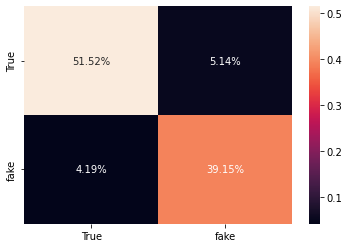

In [77]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test,y_pred)
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cf/np.sum(cf), fmt = '.2%',annot=True,xticklabels=['True','fake'],yticklabels=['True','fake'])
plt.show()

/home/abhisheksingh/anaconda3/envs/NLP/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


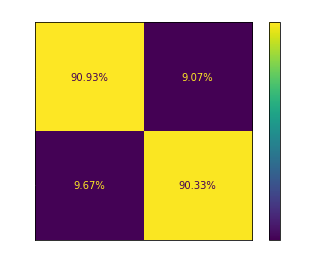

In [78]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix,ConfusionMatrixDisplay
 
color = 'white'
IC = type('IdentityClassifier', (), {"predict": lambda i : i, "_estimator_type": "classifier"})
matrix = plot_confusion_matrix(IC, y_pred, y_test, normalize='true', values_format='.2%')
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

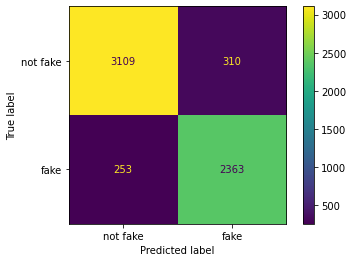

In [81]:
from sklearn.metrics import plot_confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['not fake','fake'])
disp.plot()
plt.show()